# Models used:
- [blip-image-captioning-base](https://huggingface.co/Salesforce/blip-image-captioning-base) For Image captioning
-  **Salesforce/blip-itm-base-coco**: for image search engine

In [9]:
from matplotlib import pyplot as plt
import numpy as np

In [1]:
from PIL import Image
import requests

from transformers import BlipProcessor, BlipForConditionalGeneration

model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [2]:
# List of images urls
urls = [
    'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQb7Vr1pWBDZ3W22B4stmJDciCuvvUS0KdvZQ&s', #1
    'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS64Myrx7ARPyWQTFkgSK5kUsfVYj-f0Mzirg&s', #2
    'https://lumiere-a.akamaihd.net/v1/images/image_57ecff16.jpeg?region=0,0,640,480', #3
    'https://i.pinimg.com/736x/0c/5d/f8/0c5df8f867201f8c1bd40951265cc0b2.jpg', #4
    # 'https://www.autocar.co.uk/sites/autocar.co.uk/files/styles/gallery_slide/public/images/car-reviews/first-drives/legacy/rolls_royce_phantom_top_10.jpg?itok=XjL9f1tx', #5
    # 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSzNMFUgrECfGrWrt5_lio1aF5xnqrsaLxZnQ&s', #6
    # 'https://omrania.com/wp-content/uploads/Omrania-Kingdome-Center_Saudi-Arabia-KSA-Abdullah_Aleisa.jpg', #7
    # 'https://cdn.pixabay.com/photo/2023/12/08/08/58/sea-8437245_640.jpg', #8
    # 'https://i.ytimg.com/vi/dqhVmYn4HF0/maxresdefault.jpg', #9
    # 'https://upload.wikimedia.org/wikipedia/commons/e/e7/Everest_North_Face_toward_Base_Camp_Tibet_Luca_Galuzzi_2006.jpg' # 10
    # 'https://i.insider.com/5a271fbc7101ad7b9647b9d8?width=1200&format=jpeg', # 11,
    # 'https://media.cntraveler.com/photos/5a009c8e25be133d871c008e/16:9/w_1280,c_limit/Mountain-Travel_GettyImages-503689316.jpg', # 12
    # 'https://ichef.bbci.co.uk/news/1024/branded_news/10F1C/production/_128740496_bbcm_saudi_arabia_country_profile_map_230223.jpg', # 13
    # 'https://www.agoda.com/wp-content/uploads/2019/05/Things-to-do-in-Jeddah-Saudi-Arabia-Al-Balad.jpg', # 14
    # 'https://platinumlist.net/guide/wp-content/uploads/2023/12/jeddah_break_free_landing_page_winter_campaign_1920x1080_6.jpg', # 15
    # 'https://pbs.twimg.com/media/FAdz24_WEAkYNzP.jpg', # 16
]

In [3]:
images_obj = [Image.open(requests.get(url, stream=True).raw) for url in urls]

In [4]:
inputs = processor(images=images_obj, return_tensors="pt")
outputs = model.generate(**inputs, max_length=15)

In [8]:
outputs[0]

tensor([30522,  1996,  3494,  1997,  2503,  2041,   102,     0,     0,     0,
            0,     0,     0,     0,     0])

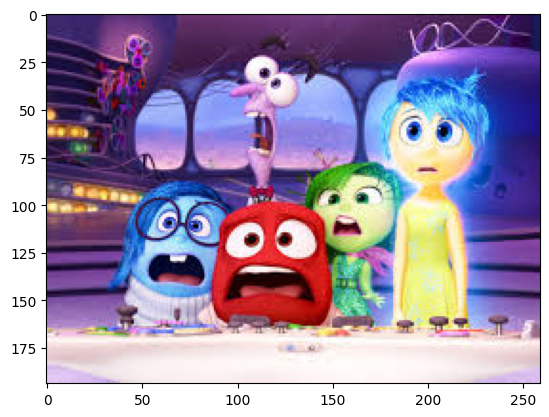

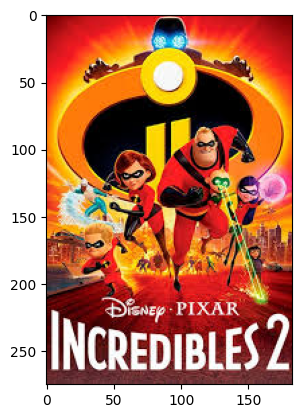

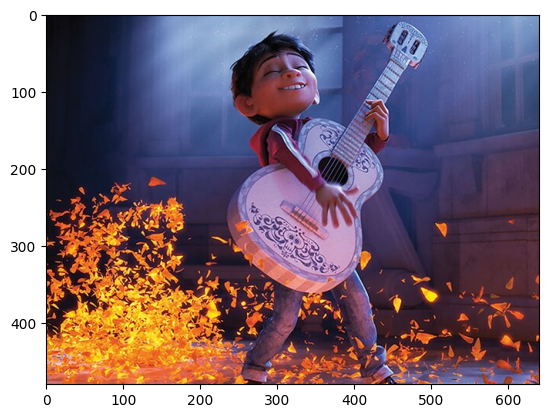

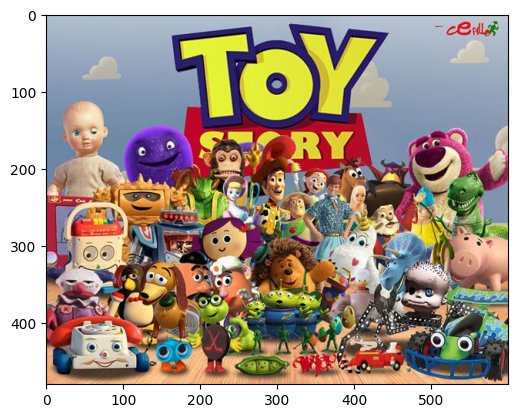

In [10]:
for image in images_obj:
    plt.show(plt.imshow(np.asarray(image)))

In [17]:
for i, image_obj in enumerate(images_obj):
    caption = processor.decode(outputs[i], skip_special_tokens=True)

    print("Generated caption:", caption)
    print()

Generated caption: the characters of inside out

Generated caption: the incredible incredible incredible incredible incredible incredible incredible incredible incredible incredible incredible incredible incredible

Generated caption: a young boy playing a guitar in the animated movie coco

Generated caption: toy story is a game about the toys that are made for children



# Image search engine

In [32]:
# model used:
from transformers import BlipProcessor, BlipModel

image_embed_model = BlipModel.from_pretrained("Salesforce/blip-itm-base-coco")
image_embed_processor = BlipProcessor.from_pretrained("Salesforce/blip-itm-base-coco")

`BlipModel` is going to be deprecated in future release, please use `BlipForConditionalGeneration`, `BlipForQuestionAnswering` or `BlipForImageTextRetrieval` depending on your usecase.
Some weights of BlipModel were not initialized from the model checkpoint at Salesforce/blip-itm-base-coco and are newly initialized: ['logit_scale', 'text_model.embeddings.LayerNorm.bias', 'text_model.embeddings.LayerNorm.weight', 'text_model.embeddings.position_embeddings.weight', 'text_model.embeddings.word_embeddings.weight', 'text_model.encoder.layer.0.attention.output.LayerNorm.bias', 'text_model.encoder.layer.0.attention.output.LayerNorm.weight', 'text_model.encoder.layer.0.attention.output.dense.bias', 'text_model.encoder.layer.0.attention.output.dense.weight', 'text_model.encoder.layer.0.attention.self.key.bias', 'text_model.encoder.layer.0.attention.self.key.weight', 'text_model.encoder.layer.0.attention.self.query.bias', 'text_model.encoder.layer.0.attention.self.query.weight', 'text_model.enco

In [29]:
from sklearn.metrics.pairwise import cosine_similarity

In [30]:
!pip install sentence_transformers

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [41]:
import torch

In [46]:
def compute_image_embedding(inputs):
    images_obj = [Image.open(requests.get(url, stream=True).raw) for url in urls]
    inputs = processor(images=images_obj, return_tensors="pt")

    with torch.no_grad():
      outputs = image_embed_model.get_image_features(**inputs)
    return outputs.cpu().numpy()

# Function to compute text embeddings
def compute_text_embedding(search_query):
    inputs = image_embed_processor(text=search_query, return_tensors="pt", padding=True)
    with torch.no_grad():
      outputs = image_embed_model.get_text_features(**inputs)
    return outputs.cpu().numpy()




query = "Tou story"

query_embedding = compute_text_embedding(query)
image_embedding = compute_image_embedding(urls)

In [47]:
query_embedding.shape, image_embedding.shape

((1, 512), (4, 512))

In [48]:
similarity_scores = cosine_similarity(image_embedding, query_embedding)

best_image_score= similarity_scores.argmax()

most_relevant_image = urls[best_image_score]

# Print results
print('Most soce image: ', most_relevant_image)
print("Similarity scores:", similarity_scores)


Most soce image:  https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQb7Vr1pWBDZ3W22B4stmJDciCuvvUS0KdvZQ&s
Similarity scores: [[-0.0190975 ]
 [-0.04548633]
 [-0.02846997]
 [-0.06691071]]
